<a href="https://colab.research.google.com/github/Legajo/Colab-Notebooks/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# install the main library YFinance
!pip install yfinance

In [9]:
## Cell 1: Import Libraries
import pandas as pd
from urllib.request import Request, urlopen
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported successfully!")

Libraries imported successfully!


In [11]:
## Cell 2: Scrape Data from Wikipedia

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Create a request with User-Agent header to avoid 403 error
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})

# Read HTML tables using the request
tables = pd.read_html(urlopen(req).read())
df = tables[0]

print("DataFrame shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

DataFrame shape: (503, 8)

Column names:
['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location', 'Date added', 'CIK', 'Founded']

First 5 rows:
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740    

In [12]:
## Cell 3: Clean and Extract Data

date_column = [col for col in df.columns if "added" in col.lower()][0]
print(f"Date added column: {date_column}")

sp500_df = pd.DataFrame({
    "Ticker": df["Symbol"],
    "Company": df["Security"],
    "Date_Added": df[date_column]
})

print("\nCleaned DataFrame:")
print(sp500_df.head(10))
print(f"\nTotal companies: {len(sp500_df)}")

Date added column: Date added

Cleaned DataFrame:
  Ticker                 Company  Date_Added
0    MMM                      3M  1957-03-04
1    AOS             A. O. Smith  2017-07-26
2    ABT     Abbott Laboratories  1957-03-04
3   ABBV                  AbbVie  2012-12-31
4    ACN               Accenture  2011-07-06
5   ADBE              Adobe Inc.  1997-05-05
6    AMD  Advanced Micro Devices  2017-03-20
7    AES         AES Corporation  1998-10-02
8    AFL                   Aflac  1999-05-28
9      A    Agilent Technologies  2000-06-05

Total companies: 503


In [13]:
## Cell 4: Extract Year from Date

sp500_df["Year_Added"] = sp500_df["Date_Added"].astype(str).str.extract(r"(\d{4})")
sp500_df["Year_Added"] = pd.to_numeric(sp500_df["Year_Added"], errors="coerce")

print("DataFrame with extracted years:")
print(sp500_df.head(10))

missing_years = sp500_df["Year_Added"].isna().sum()
print(f"\nRows with missing years: {missing_years}")

DataFrame with extracted years:
  Ticker                 Company  Date_Added  Year_Added
0    MMM                      3M  1957-03-04        1957
1    AOS             A. O. Smith  2017-07-26        2017
2    ABT     Abbott Laboratories  1957-03-04        1957
3   ABBV                  AbbVie  2012-12-31        2012
4    ACN               Accenture  2011-07-06        2011
5   ADBE              Adobe Inc.  1997-05-05        1997
6    AMD  Advanced Micro Devices  2017-03-20        2017
7    AES         AES Corporation  1998-10-02        1998
8    AFL                   Aflac  1999-05-28        1999
9      A    Agilent Technologies  2000-06-05        2000

Rows with missing years: 0


In [14]:
## Cell 5: Count Additions per Year (Excluding 1957)
df_filtered = sp500_df[
    (sp500_df["Year_Added"] != 1957) &
    (sp500_df["Year_Added"].notna())
].copy()

year_counts = df_filtered["Year_Added"].value_counts().sort_index()
year_counts_df = pd.DataFrame({
    "Year": year_counts.index.astype(int),
    "Additions": year_counts.values
})

print("Additions per year (excluding 1957):")
print(year_counts_df)

Additions per year (excluding 1957):
    Year  Additions
0   1964          1
1   1965          2
2   1969          2
3   1970          2
4   1972          2
5   1973          2
6   1974          1
7   1975          2
8   1976         11
9   1978          1
10  1979          1
11  1980          3
12  1981          3
13  1982          5
14  1983          3
15  1984          4
16  1985          7
17  1986          3
18  1987          2
19  1988          4
20  1989          5
21  1991          1
22  1992          3
23  1993          3
24  1994          7
25  1995          7
26  1996          2
27  1997         14
28  1998         11
29  1999          9
30  2000          9
31  2001          8
32  2002         13
33  2003          5
34  2004          6
35  2005          7
36  2006          9
37  2007         12
38  2008         17
39  2009         12
40  2010          9
41  2011         10
42  2012         14
43  2013         10
44  2014          8
45  2015         14
46  2016         23
47 

In [15]:
## Cell 6: Find Year with Highest Additions

max_additions = year_counts_df["Additions"].max()
years_with_max = year_counts_df[year_counts_df["Additions"] == max_additions]
answer_year = years_with_max["Year"].max()

print("\n" + "="*50)
print("ANSWER")
print("="*50)
print(f"Year with highest number of additions: {answer_year}")
print(f"Number of additions in {answer_year}: {max_additions}")
print("="*50)

if len(years_with_max) > 1:
    print(f"\nNote: Multiple years had {max_additions} additions:")
    print(years_with_max.to_string(index=False))
    print(f"Most recent year selected: {answer_year}")


ANSWER
Year with highest number of additions: 2016
Number of additions in 2016: 23


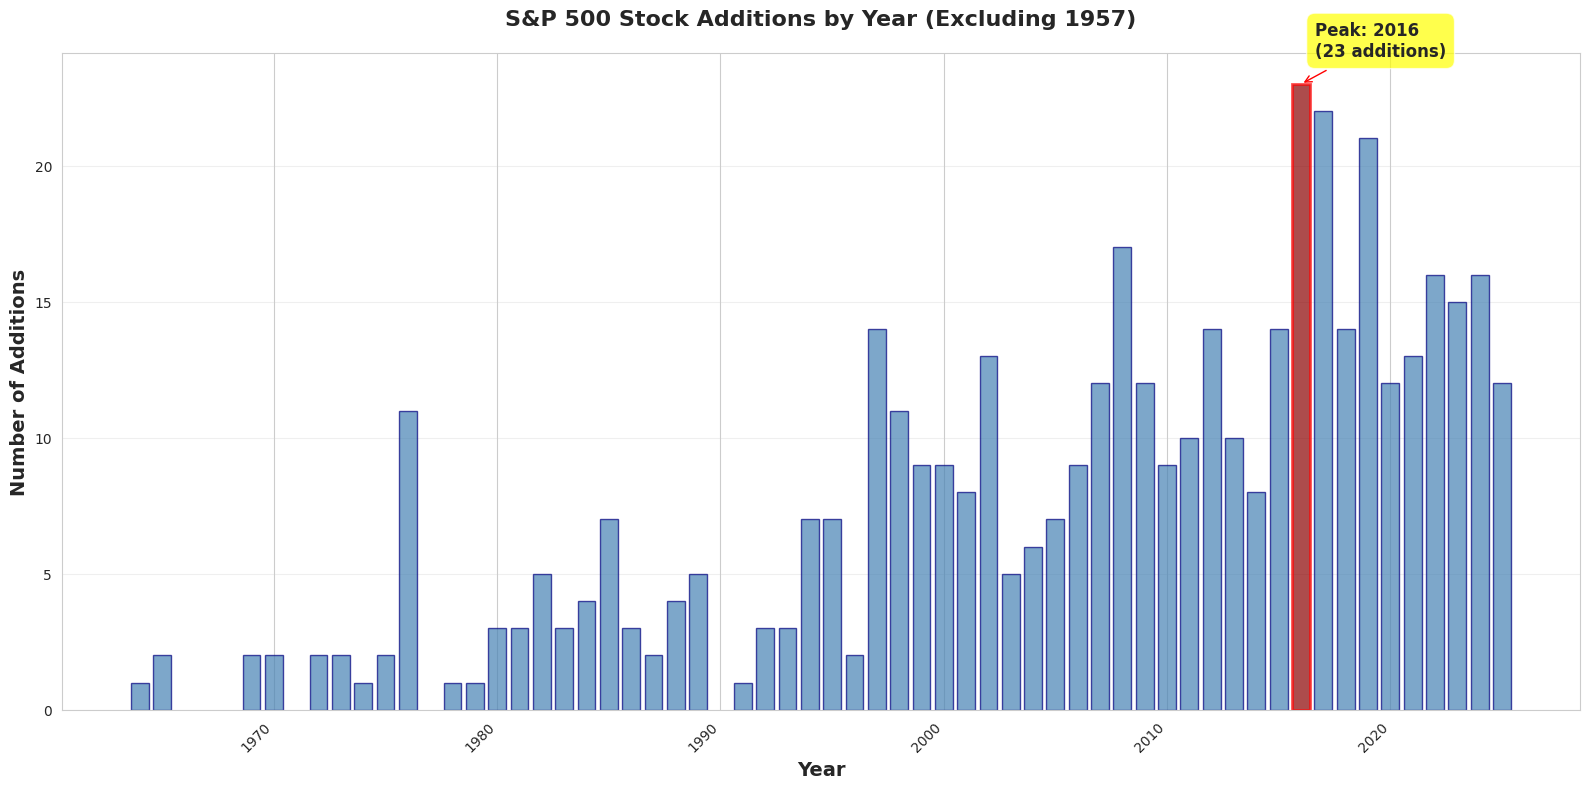

In [16]:
## Cell 7: Create Visualization

sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

bars = plt.bar(year_counts_df["Year"], year_counts_df["Additions"],
               color="steelblue", edgecolor="navy", alpha=0.7)

max_year_idx = year_counts_df[year_counts_df["Year"] == answer_year].index[0]
bars[max_year_idx].set_color("darkred")
bars[max_year_idx].set_edgecolor("red")
bars[max_year_idx].set_linewidth(2)

plt.xlabel("Year", fontsize=14, fontweight="bold")
plt.ylabel("Number of Additions", fontsize=14, fontweight="bold")
plt.title("S&P 500 Stock Additions by Year (Excluding 1957)",
          fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)

plt.annotate(f"Peak: {answer_year}\n({max_additions} additions)",
             xy=(answer_year, max_additions),
             xytext=(10, 20), textcoords="offset points",
             bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.7),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0", color="red"),
             fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

In [17]:
## Cell 8: Summary Statistics

print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(f"Total companies analyzed: {len(sp500_df)}")
print(f"Companies added after 1957: {len(df_filtered)}")
print(f"Year range: {year_counts_df['Year'].min()} - {year_counts_df['Year'].max()}")
print(f"Average additions per year: {year_counts_df['Additions'].mean():.2f}")
print(f"Median additions per year: {year_counts_df['Additions'].median():.0f}")
print(f"Total years with additions: {len(year_counts_df)}")
print("="*50)

print("\nTop 5 years with most additions:")
print(year_counts_df.nlargest(5, "Additions").to_string(index=False))


SUMMARY STATISTICS
Total companies analyzed: 503
Companies added after 1957: 450
Year range: 1964 - 2025
Average additions per year: 8.04
Median additions per year: 7
Total years with additions: 56

Top 5 years with most additions:
 Year  Additions
 2016         23
 2017         22
 2019         21
 2008         17
 2022         16



STOCKS IN INDEX FOR MORE THAN 20 YEARS
Current year: 2025
Number of stocks in index > 20 years: 217

Percentage of total: 43.1%
Oldest stock added in: 1957
Most recent stock added in: 2025

Top 10 longest-tenured stocks:
Ticker                 Company  Year_Added  Years_In_Index
   MMM                      3M        1957              68
   ABT     Abbott Laboratories        1957              68
   AEP American Electric Power        1957              68
    MO                  Altria        1957              68
   ADM  Archer Daniels Midland        1957              68
   CVS              CVS Health        1957              68
    ED     Consolidated Edison        1957              68
   COP          ConocoPhillips        1957              68
   CMS              CMS Energy        1957              68
    KO Coca-Cola Company (The)        1957              68


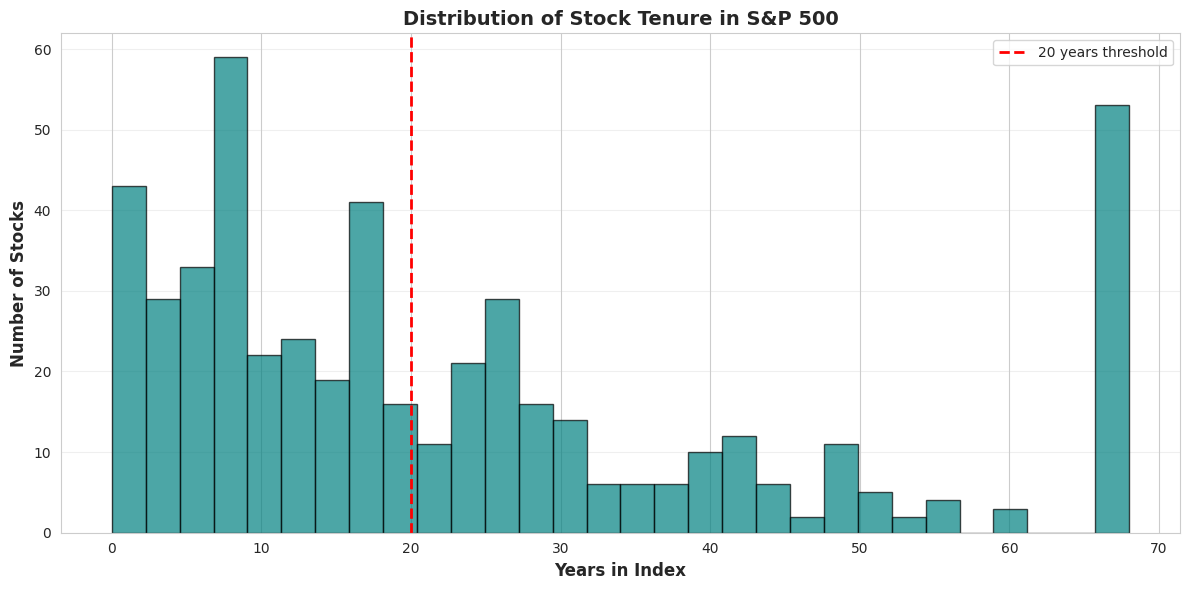

In [18]:
## Cell 9: Stocks in Index for More Than 20 Years

from datetime import datetime

current_year = 2025
years_threshold = 20

# Calculate how long each stock has been in the index
sp500_df["Years_In_Index"] = current_year - sp500_df["Year_Added"]

# Filter stocks that have been in the index for more than 20 years
stocks_20plus_years = sp500_df[sp500_df["Years_In_Index"] > years_threshold].copy()

# Count the number of stocks
count_20plus = len(stocks_20plus_years)

print("\n" + "="*50)
print("STOCKS IN INDEX FOR MORE THAN 20 YEARS")
print("="*50)
print(f"Current year: {current_year}")
print(f"Number of stocks in index > 20 years: {count_20plus}")
print("="*50)

# Show some statistics
print(f"\nPercentage of total: {(count_20plus / len(sp500_df)) * 100:.1f}%")
print(f"Oldest stock added in: {sp500_df['Year_Added'].min()}")
print(f"Most recent stock added in: {sp500_df['Year_Added'].max()}")

# Show top 10 longest-tenured stocks
stocks_20plus_years_sorted = stocks_20plus_years.sort_values("Year_Added")
print("\nTop 10 longest-tenured stocks:")
print(stocks_20plus_years_sorted[["Ticker", "Company", "Year_Added", "Years_In_Index"]].head(10).to_string(index=False))

# Create visualization
plt.figure(figsize=(12, 6))
plt.hist(sp500_df["Years_In_Index"].dropna(), bins=30, color="teal", edgecolor="black", alpha=0.7)
plt.axvline(x=years_threshold, color="red", linestyle="--", linewidth=2, label=f"20 years threshold")
plt.xlabel("Years in Index", fontsize=12, fontweight="bold")
plt.ylabel("Number of Stocks", fontsize=12, fontweight="bold")
plt.title("Distribution of Stock Tenure in S&P 500", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()